# DataFrame 응용

## 함수 적용

### apply 함수 - 각 요소에 함수 적용

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns

#seaborn 이 가지고 있는 titanic 이라는 데이터를 가져오기
#titanic 데이터는 회귀나 분류 할 때 많이 사용
#각 속성에 따른 생존 여부
titanic = sns.load_dataset('titanic')
#titanic.info()

#age 와 fare 열만 추출
df = titanic[['age', 'fare']]
#print(df)

#열을 추가 - 없는 열이름 속성에 데이터를 대입하면 됩니다.
df['ten'] = 10
print(df)


#apply 함수에 적용할 함수 생성
def func1():
    print("매개변수가 없고 리턴이 없는 함수")
    
def func2(a):
    return a + 10

def func3(a, b):
    return a + b


#매개변수가 없는 함수를 대입해서 매개변수의 최소 개수를 위반
#df.apply(func1)

#매개변수의 최소 개수 와 리턴을 만족했기 때문에 정상 수행
#print(df.apply(func2))

#매개변수가 남는 거는 가능한데 남는 매개변수에 값을 대입해야 합니다.
#print(df.apply(func3, b=20))



      age     fare  ten
0    22.0   7.2500   10
1    38.0  71.2833   10
2    26.0   7.9250   10
3    35.0  53.1000   10
4    35.0   8.0500   10
..    ...      ...  ...
886  27.0  13.0000   10
887  19.0  30.0000   10
888   NaN  23.4500   10
889  26.0  30.0000   10
890  32.0   7.7500   10

[891 rows x 3 columns]


C:\Users\tj\AppData\Local\Temp/ipykernel_12496/4118502250.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ten'] = 10


40

### pipe 함수 - 함수에 함수를 적용하는 것이 가능

In [15]:
#하나의 값을 받아서 결과를 리턴하는 함수
def missing_value(x):
    return x.isnull()

#위 함수의 결과 집계
def missing_count(x):
    return missing_value(x).sum()

#위 함수의 결과를 이용해서 집계
def total_missing_count(x):
    return missing_count(x).sum()

#print(df.pipe(missing_value)) #DataFrame 이 리턴

#print(df.pipe(missing_count))  #Series 리턴

print(df.pipe(total_missing_count))  #1개의 값 리턴

177


## 열의 재구성

### 하나로 구성되어 있는 날짜 데이터를 분리하기

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns

stock = pd.read_excel('./data/주가데이터.xlsx')
#print(stock)
#stock.info()

#연월일을 문자열로 변환
stock['연월일'] = stock['연월일'].astype('str')

#-로 분할해서 list로 만들어서 리턴
dates = stock['연월일'].str.split('-')

#년월일 컬럼 생성
stock['년도'] = dates.str.get(0)
stock['월'] = dates.str.get(1)
stock['일'] = dates.str.get(2)

print(stock)

           연월일   당일종가  전일종가     시가     고가     저가     거래량    년도   월   일
0   2018-07-02  10100   600  10850  10900  10000  137977  2018  07  02
1   2018-06-29  10700   300  10550  10900   9990  170253  2018  06  29
2   2018-06-28  10400   500  10900  10950  10150  155769  2018  06  28
3   2018-06-27  10900   100  10800  11050  10500  133548  2018  06  27
4   2018-06-26  10800   350  10900  11000  10700   63039  2018  06  26
5   2018-06-25  11150   150  11400  11450  11000   55519  2018  06  25
6   2018-06-22  11300   100  11250  11450  10750  134805  2018  06  22
7   2018-06-21  11200   350  11350  11750  11200  133002  2018  06  21
8   2018-06-20  11550   250  11200  11600  10900  308596  2018  06  20
9   2018-06-19  11300   700  11850  11950  11300  180656  2018  06  19
10  2018-06-18  12000  1400  13400  13400  12000  309787  2018  06  18
11  2018-06-15  13400    50  13600  13600  12900  201376  2018  06  15
12  2018-06-14  13450   250  13200  13700  13150  347451  2018  06  14
13  20

## 필터링

### 조건 연산자

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns

#seaborn 이 가지고 있는 titanic 이라는 데이터를 가져오기
#titanic 데이터는 회귀나 분류 할 때 많이 사용
#각 속성에 따른 생존 여부
titanic = sns.load_dataset('titanic')

#titanic.info()

#age 가 30 이상인 데이터만 추출
#titanic.loc[titanic['age'] >= 30]

#age 가 30 ~ 39 사이인 데이터 중 여자만 추출
titanic.loc[(titanic['age'] >= 30) & (titanic['age'] <= 39) 
           & (titanic['sex'] == 'female')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
18,0,3,female,31.0,1,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False
25,1,3,female,38.0,1,5,31.3875,S,Third,woman,False,NaN,Southampton,yes,False
61,1,1,female,38.0,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
79,1,3,female,30.0,0,0,12.4750,S,Third,woman,False,NaN,Southampton,yes,True
85,1,3,female,33.0,3,0,15.8500,S,Third,woman,False,NaN,Southampton,yes,False
98,1,2,female,34.0,0,1,23.0000,S,Second,woman,False,NaN,Southampton,yes,False
123,1,2,female,32.5,0,0,13.0000,S,Second,woman,False,E,Southampton,yes,True
190,1,2,female,32.0,0,0,13.0000,S,Second,woman,False,NaN,Southampton,yes,True


### isin

In [38]:
#titanic 에서 sibsp 가 3, 4, 5 인 데이터를 추출
titanic.loc[(titanic['sibsp'] == 3) | (titanic['sibsp'] == 4) 
           | (titanic['sibsp'] == 5)]

titanic.loc[titanic['sibsp'].isin([3,4,5])]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
50,0,3,male,7.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
59,0,3,male,11.0,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False
63,0,3,male,4.0,3,2,27.9000,S,Third,child,False,NaN,Southampton,no,False
68,1,3,female,17.0,4,2,7.9250,S,Third,woman,False,NaN,Southampton,yes,False
71,0,3,female,16.0,5,2,46.9000,S,Third,woman,False,NaN,Southampton,no,False
85,1,3,female,33.0,3,0,15.8500,S,Third,woman,False,NaN,Southampton,yes,False


## 데이터 결합

### concat

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns

df1 = pd.DataFrame({'a':['1', '2', '3', '4'],
                   'b':['a', 'b', 'c', 'd']},
                  index = [0,1,2,3])

df2 = pd.DataFrame({'a':['11', '22', '33', '44'],
                   'b':['aa', 'bb', 'cc', 'dd']},
                  index = [2,3,4,5])
#위 아래로 결합
#print(pd.concat([df1, df2]))

#좌 우로 결합 - outer
#print(pd.concat([df1, df2], axis=1))

#좌 우로 결합 - outer
print(pd.concat([df1, df2], axis=1, join='inner'))

   a  b   a   b
2  3  c  11  aa
3  4  d  22  bb


### merge - join 과 유사

In [50]:
#데이터 가져오기
price = pd.read_excel('./data/stock price.xlsx')
#price.info()

valuation = pd.read_excel('./data/stock valuation.xlsx')
#valuation.info()

#양쪽 모두에 존재하는 데이터만 결합 - id 라는 공통 열을 가지고 join
merge_inner = pd.merge(price, valuation)
#print(merge_inner)

#모든 데이터 결합 - id 라는 공통 열을 가지고 join
merge_outer = pd.merge(price, valuation, how='outer', on='id')
#print(merge_outer)

#서로 다른 열 이름을 가지고 join
merge_outer = pd.merge(price, valuation, how='outer',
                      left_on='stock_name', right_on='name')
#print(merge_outer)

        id_x stock_name          value     price      id_y       name  \
0   128940.0       한미약품   59385.666667  421000.0       NaN        NaN   
1   130960.0     CJ E&M   58540.666667   98900.0  130960.0     CJ E&M   
2   138250.0      엔에스쇼핑   14558.666667   13200.0       NaN        NaN   
3   139480.0        이마트  239230.833333  254500.0  139480.0        이마트   
4   142280.0     녹십자엠에스     468.833333   10200.0       NaN        NaN   
5   145990.0        삼양사   82750.000000   82000.0  145990.0        삼양사   
6   185750.0        종근당   40293.666667  100500.0  185750.0        종근당   
7   192400.0      쿠쿠홀딩스  179204.666667  177500.0       NaN        NaN   
8   199800.0         툴젠   -2514.333333  115400.0       NaN        NaN   
9   204210.0     모두투어리츠    3093.333333    3475.0  204210.0     모두투어리츠   
10       NaN        NaN            NaN       NaN  136480.0         하림   
11       NaN        NaN            NaN       NaN  138040.0    메리츠금융지주   
12       NaN        NaN            NaN       NaN  1

## 그룹화

### 그룹화

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
#titanic.info()

#age, sex, class, fare, survived 열만 추출
df = titanic[['age', 'sex', 'class', 'fare', 'survived']]
#print(df.head())

#class 별로 그룹화
grouped = df.groupby(['class'])
#print(grouped)

#그룹 객체를 iterator를 이용해서 출력
'''
for key, group in grouped:
    print('key:', key)
    print('  count:', len(group))
    print(group.head())
    print()
'''

#그룹별 평균
average = grouped.mean()
#print(average)

#그룹별 선택
group1 = grouped.get_group('First')
#print(group1.head())


#2개의 항목으로 그룹화
group_two = df.groupby(['class', 'sex'])
for key, group in group_two:
    print('key:', key)
    print('  count:', len(group))
    print(group.head())
    print()

key: ('First', 'female')
  count: 94
     age     sex  class      fare  survived
1   38.0  female  First   71.2833         1
3   35.0  female  First   53.1000         1
11  58.0  female  First   26.5500         1
31   NaN  female  First  146.5208         1
52  49.0  female  First   76.7292         1

key: ('First', 'male')
  count: 122
     age   sex  class      fare  survived
6   54.0  male  First   51.8625         0
23  28.0  male  First   35.5000         1
27  19.0  male  First  263.0000         0
30  40.0  male  First   27.7208         0
34  28.0  male  First   82.1708         0

key: ('Second', 'female')
  count: 76
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
41  27.0  female  Second  21.0000         0
43   3.0  female  Second  41.5792         1
53  29.0  female  Second  26.0000         1

key: ('Second', 'male')
  count: 108
     age   sex   class  fare  survived
17   NaN  male  Second  13.0  

### 그룹별 집계

In [69]:
# seaborn 의 titanic 데이터를 가져와서 class 별로 그룹화
import numpy as np
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')

grouped = titanic.groupby(['class'])

'''
for key, group in grouped:
    print(key)
    print(group.head())
'''

#모든 열의 표준편차를 구해서 출력
#grouped.std()

#특정 열의 표준편차를 구해서 출력
#grouped.fare.std()
#grouped['fare'].std()

#사용자 정의 함수를 적용 - 최대값에서 최소값을 뺀 값을 리턴
def min_max(x):
    return x.max() - x.min()

#grouped.agg(min_max)

#여러 개 함수 적용
#grouped.agg(['min', 'max', 'sum'])

#열 별로 다른 함수 적용
grouped.agg({'fare':['min', 'max', 'sum'], 'age':'mean'})

fare                              age
        min       max         sum       mean
class                                       
First   0.0  512.3292  18177.4125  38.233441
Second  0.0   73.5000   3801.8417  29.877630
Third   0.0   69.5500   6714.6951  25.140620

### 변환

In [71]:
#z-score를 구해주는 함수
#평균을 뺀 값을 표준편차로 나누어서 리턴하는 함수
def z_score(x):
    return (x - x.mean()) / x.std()


age_zscore = grouped.age.transform(z_score)
print(age_zscore)

0     -0.251342
1     -0.015770
2      0.068776
3     -0.218434
4      0.789041
         ...   
886   -0.205529
887   -1.299306
888         NaN
889   -0.826424
890    0.548953
Name: age, Length: 891, dtype: float64


### 필터링 - RDBMS 의 SQL에서 Having

In [73]:
#필터링을 할 때는 매개변수가 1개이고 bool을 리턴하는 함수를 이용

#데이터의 개수가 200 이상인 그룹만 추출
def over_200(x):
    return len(x) >= 200
#Second 그룹 제외
#filtering_group = grouped.filter(over_200)

#람다 이용 - 람다가 한 줄 짜리 이름없는 함수
filtering_group = grouped.filter(lambda x:len(x) >= 200)
print(filtering_group.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### 멀티 인덱스

In [79]:
# seaborn 의 titanic 데이터를 가져와서 class 별로 그룹화
import numpy as np
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
#print(titanic.head())

#2개의 범주형으로 그룹화 - 다단 인덱스
grouped = titanic.groupby(['class', 'sex'])
mean_group = grouped.mean()

## 다단에서 원하는 데이터 선택
print(mean_group.loc[('First', 'male')])

print(mean_group.xs('male', level='sex'))

survived       0.368852
pclass         1.000000
age           41.281386
sibsp          0.311475
parch          0.278689
fare          67.226127
adult_male     0.975410
alone          0.614754
Name: (First, male), dtype: float64
        survived  pclass        age     sibsp     parch       fare  \
class                                                                
First   0.368852     1.0  41.281386  0.311475  0.278689  67.226127   
Second  0.157407     2.0  30.740707  0.342593  0.222222  19.741782   
Third   0.135447     3.0  26.507589  0.498559  0.224784  12.661633   

        adult_male     alone  
class                         
First     0.975410  0.614754  
Second    0.916667  0.666667  
Third     0.919308  0.760807  


### 피봇테이블

In [80]:
# seaborn 의 titanic 데이터를 가져와서 class 별로 그룹화
import numpy as np
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic[['age', 'sex', 'class', 'fare', 'survived']]

pivot_1 = pd.pivot_table(df,
                        index = 'class',
                        columns = 'sex',
                        values='age',
                        aggfunc='mean')
print(pivot_1)

sex        female       male
class                       
First   34.611765  41.281386
Second  28.722973  30.740707
Third   21.750000  26.507589


## 서울시 구별 CCTV와 인구 관계 분석

### 사용할 패키지 import 

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns

#시각화 패키지
import matplotlib.pyplot as plt

#시각화 할 때 한글을 출력할 수 있도록 하기 위해서
import platform
from matplotlib import font_manager, rc

#한글 처리
#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(
        fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)


### cctv 데이터 읽어오기

In [82]:
cctv = pd.read_excel("./data/cctv.xlsx")
cctv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기관명       25 non-null     object 
 1   소계        25 non-null     int64  
 2   2011년 이전  23 non-null     float64
 3   2012년     23 non-null     float64
 4   2013년     23 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB


### 인구 데이터 읽기 - pop.txt

In [84]:
pop = pd.read_csv('./data/pop.txt', encoding='utf-8',
                 delimiter='\t', thousands=',', skiprows=2)
pop

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2021.2/4,합계,4405638,9795426,4756178,5039248,9565990,4649442,4916548,229436,106736,122700,2.17,1576971
1,2021.2/4,종로구,73525,155106,75009,80097,146029,70985,75044,9077,4024,5053,1.99,27605
2,2021.2/4,중구,62897,132259,64526,67733,123016,60019,62997,9243,4507,4736,1.96,23980
3,2021.2/4,용산구,111650,240665,116858,123807,226378,108948,117430,14287,7910,6377,2.03,38884
4,2021.2/4,성동구,134542,295767,143927,151840,289162,141042,148120,6605,2885,3720,2.15,45591
5,2021.2/4,광진구,166957,355306,170624,184682,342481,165233,177248,12825,5391,7434,2.05,50815
6,2021.2/4,동대문구,166372,352259,172865,179394,338040,167335,170705,14219,5530,8689,2.03,61262
7,2021.2/4,중랑구,185073,394679,194556,200123,389972,192688,197284,4707,1868,2839,2.11,70172
8,2021.2/4,성북구,194364,443206,212849,230357,433658,209210,224448,9548,3639,5909,2.23,73568
9,2021.2/4,강북구,144525,306093,148824,157269,302645,147542,155103,3448,1282,2166,2.09,63383


### 열이름 변경 과 인덱스 설정

In [86]:
#cctv 에서 첫번째 컬럼의 이름을 구별로 변경
cctv.rename(columns={cctv.columns[0]:'구별'}, inplace=True)
cctv.info()

#pop 에서 두번째 컬럼의 이름을 구별로 변경
pop.rename(columns={pop.columns[1]:'구별'}, inplace=True)
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   기간        26 non-null     object 
 1   구별        26 non-null     object 
 2   세대        26 non-null     int64  
 3   계         26 non-null     int64  
 4   남자        26 non-null     int64  
 5   여자        26 non-null     int64  
 6   계.1       26 non-null     int64  
 7   남자.1      26 non-null     int64  
 8   여자.1      26 non-null     int64  
 9   계.2       26 non-null     int64  
 10  남자.2      26 non-null     int64  
 11  여자.2      26 non-null     int64  
 12  세대당인구     26 non-null     float64
 13  65세이상고령자  26 non-null     int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 3.0+ KB


### 공통된 컬럼의 값을 동일한 구조로 변경

In [89]:
#cctv 의 구별 데이터의 공백을 모두 제거
gu = []
for x in cctv['구별']:
    gu.append(x.replace(' ', ''))
    
cctv['구별'] = gu
print(cctv['구별'])

0      강남구
1      강동구
2      강북구
3      강서구
4      관악구
5      광진구
6      구로구
7      금천구
8      노원구
9      도봉구
10    동대문구
11     동작구
12     마포구
13    서대문구
14     서초구
15     성동구
16     성북구
17     송파구
18     양천구
19    영등포구
20     용산구
21     은평구
22     종로구
23      중구
24     중랑구
Name: 구별, dtype: object


### 데이터 필터링

In [92]:
#pop 에서 기간, 구별, 계, 남자, 여자 열만 추출
pop_filter = pop[['기간', '구별', '계', '남자', '여자']]
pop_filter

#pop_filter에서 첫번째 행 제거
pop_filter_result = pop_filter.drop([0])
pop_filter_result

,기간,구별,계,남자,여자
1,2021.2/4,종로구,155106,75009,80097
2,2021.2/4,중구,132259,64526,67733
3,2021.2/4,용산구,240665,116858,123807
4,2021.2/4,성동구,295767,143927,151840
5,2021.2/4,광진구,355306,170624,184682
6,2021.2/4,동대문구,352259,172865,179394
7,2021.2/4,중랑구,394679,194556,200123
8,2021.2/4,성북구,443206,212849,230357
9,2021.2/4,강북구,306093,148824,157269
10,2021.2/4,도봉구,322419,156843,165576


### 새로운 열 추가

In [93]:
pop_filter_result['여성비율'] = pop['여자'] / pop['계'] * 100
pop_filter_result

,기간,구별,계,남자,여자,여성비율
1,2021.2/4,종로구,155106,75009,80097,51.640169
2,2021.2/4,중구,132259,64526,67733,51.212394
3,2021.2/4,용산구,240665,116858,123807,51.443708
4,2021.2/4,성동구,295767,143927,151840,51.337708
5,2021.2/4,광진구,355306,170624,184682,51.978295
6,2021.2/4,동대문구,352259,172865,179394,50.926733
7,2021.2/4,중랑구,394679,194556,200123,50.705257
8,2021.2/4,성북구,443206,212849,230357,51.975154
9,2021.2/4,강북구,306093,148824,157269,51.379483
10,2021.2/4,도봉구,322419,156843,165576,51.354294


### 2개의 데이터 합치기 - key는 구별

In [94]:
df = pd.merge(cctv, pop_filter_result, on='구별')
df

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,기간,계,남자,여자,여성비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,2021.2/4,536107,256449,279658,52.164587
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,2021.2/4,469094,230388,238706,50.886603
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,2021.2/4,306093,148824,157269,51.379483
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,2021.2/4,582995,280822,302173,51.831148
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,2021.2/4,502698,251713,250985,49.927591
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,2021.2/4,355306,170624,184682,51.978295
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486,2021.2/4,424582,210936,213646,50.319137
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,2021.2/4,244685,124394,120291,49.161575
8,노원구,1906,481.0,117.0,203.0,80,461,298,110,156,2021.2/4,520005,250532,269473,51.821232
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71,2021.2/4,322419,156843,165576,51.354294


### 불필요한 열 제거

In [95]:
df_filtering = df.drop(['2011년 이전', '2012년', '2013년',
            '2014년', '2015년', '2016년', '2017년', '기간'],
                      axis=1)
df_filtering

,구별,소계,2018년,계,남자,여자,여성비율
0,강남구,5221,448,536107,256449,279658,52.164587
1,강동구,1879,385,469094,230388,238706,50.886603
2,강북구,1265,319,306093,148824,157269,51.379483
3,강서구,1617,254,582995,280822,302173,51.831148
4,관악구,3985,671,502698,251713,250985,49.927591
5,광진구,1581,346,355306,170624,184682,51.978295
6,구로구,3227,486,424582,210936,213646,50.319137
7,금천구,1634,530,244685,124394,120291,49.161575
8,노원구,1906,156,520005,250532,269473,51.821232
9,도봉구,858,71,322419,156843,165576,51.354294


### 구별을 인덱스로 설정

In [96]:
df_idx = df_filtering.set_index('구별')
df_idx

,소계,2018년,계,남자,여자,여성비율
구별,,,,,,
강남구,5221,448,536107,256449,279658,52.164587
강동구,1879,385,469094,230388,238706,50.886603
강북구,1265,319,306093,148824,157269,51.379483
강서구,1617,254,582995,280822,302173,51.831148
관악구,3985,671,502698,251713,250985,49.927591
광진구,1581,346,355306,170624,184682,51.978295
구로구,3227,486,424582,210936,213646,50.319137
금천구,1634,530,244685,124394,120291,49.161575
노원구,1906,156,520005,250532,269473,51.821232


### 막대 그래프 그리기

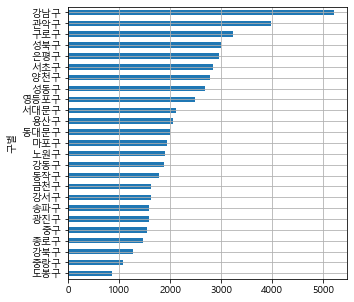

In [99]:
#cctv 개수를 시각화
df_idx['소계'].sort_values().plot(
    kind='barh', grid=True, figsize=(5,5))
plt.show()

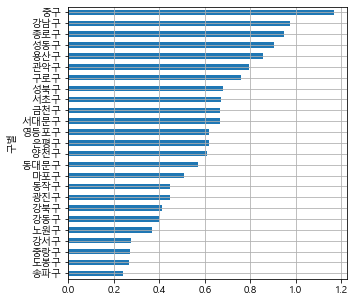

In [100]:
#cctv 개수를 인구수로 나눈 결과를 시각화
df_idx['cctv비율'] = df_idx['소계']/df_idx['계'] * 100
df_idx['cctv비율'].sort_values().plot(
    kind='barh', grid=True, figsize=(5,5))
plt.show()

### 산점도 그리기

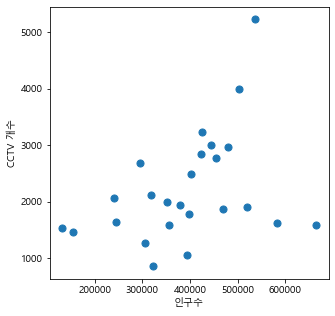

In [102]:
plt.figure(figsize=(5,5))

plt.scatter(df['계'], df['소계'], s=50)

plt.xlabel('인구수')
plt.ylabel('CCTV 개수')

plt.show()

### 산점도 에 회귀선 적용

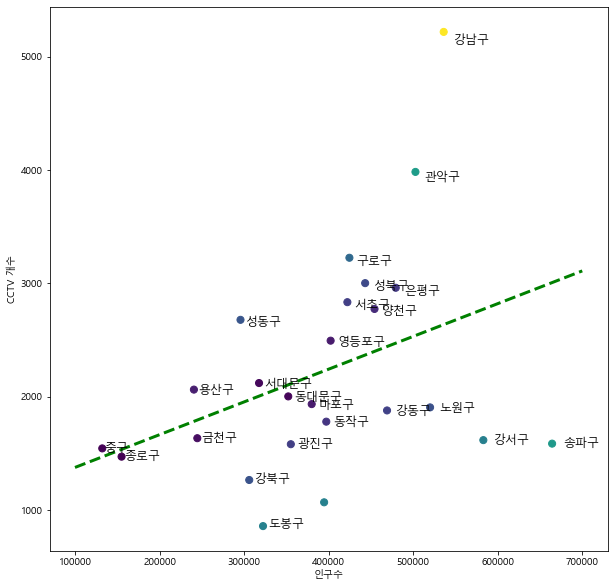

In [112]:
# 2개의 데이터를 가지고 회귀식을 생성
fp1 = np.polyfit(df_idx['계'], df_idx['소계'], 1)
f1 = np.poly1d(fp1)
#print(f1)

#100000 부터 700000 까지 100 개로 분할한 데이터 생성
fx = np.linspace(100000, 700000, 100)

#잔차 계산 - 잔차:실제 데이터 와 예측한 데이터의 차이
df_idx['잔차'] = np.abs(df_idx['소계'] - f1(df_idx['계']))

plt.figure(figsize=(10,10))
plt.scatter(df_idx['계'], df_idx['소계'], 
            c=df_idx['잔차'], s = 50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

#텍스트 입력
for n in range(24):
    #앞의 2개는 좌표이고 세번째는 텍스트 fontsize는 글자크기
    plt.text(df_idx['계'][n] * 1.02,
            df_idx['소계'][n] * 0.98,
            df_idx.index[n],
            fontsize=12)

plt.xlabel('인구수')
plt.ylabel('CCTV 개수')

plt.show()

## 데이터 구조화

### 크로스 탭 - 도수 분포표

In [115]:
data = pd.DataFrame(
    {'id':['id1', 'id2', 'id3', 'id1', 'id2', 'id3'],
    'fac_1':['a','a','a','b','b','b'],
    'fac_2':['d','d','d','c','c','d']})

print(data)
print()
#분류를 하고 난 후 성능을 확인할 때 많이 수행
print(pd.crosstab(data.fac_1, data.fac_2))

    id fac_1 fac_2
0  id1     a     d
1  id2     a     d
2  id3     a     d
3  id1     b     c
4  id2     b     c
5  id3     b     d

fac_2  c  d
fac_1      
a      0  3
b      2  1
